# **Importing Standard libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Dataset Exploration**

In [ ]:
df = pd.read_csv('malicious_phish.csv', on_bad_lines='skip')
df.head(10)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://www.pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [ ]:
df.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


In [ ]:
df.size

1302382

In [ ]:
df.dropna()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [ ]:
df["type"].unique()

array(['phishing', 'benign', 'defacement', 'malware'], dtype=object)

# **Preprocessing**

In [ ]:
benign_len = df[df['type'] == 'benign'].shape[0]
defacement_len = df[df['type'] == 'defacement'].shape[0]
phishing_len = df[df['type'] == 'phishing'].shape[0]
malware_len = df[df['type'] == 'malware'].shape[0]
print(benign_len, defacement_len, phishing_len, malware_len)

428103 96457 94111 32520


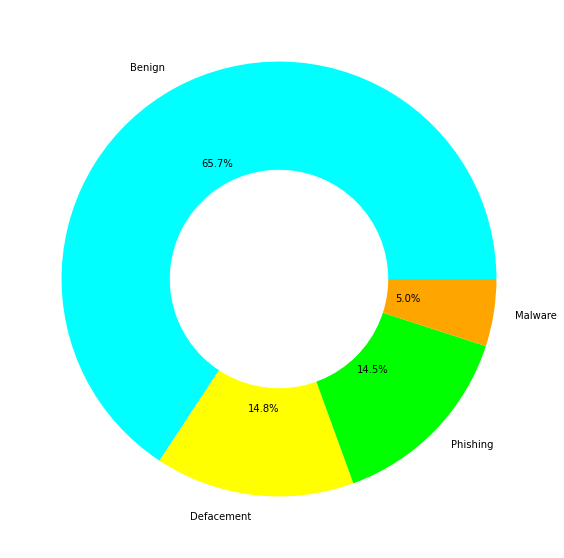

In [ ]:
valuecount = df['type'].value_counts()
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(valuecount, labels=['Benign','Defacement','Phishing', 'Malware'], colors=['cyan','yellow','lime','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

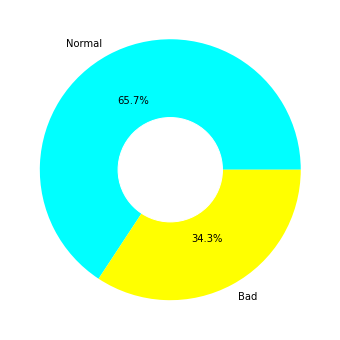

In [ ]:
valuecount = [benign_len, defacement_len + phishing_len + malware_len]
plt.figure(figsize=(10,6))
my_circle=plt.Circle( (0,0), 0.4, color='white')
plt.pie(valuecount, labels=['Normal' , "Bad"], colors=['cyan','yellow'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
df['type']= LabelEncoder().fit_transform(df['type'])
df

,url,type
0,br-icloud.com.br,3
1,mp3raid.com/music/krizz_kaliko.html,0
2,bopsecrets.org/rexroth/cr/1.htm,0
3,http://www.garage-pirenne.be/index.php?option=...,1
4,http://adventure-nicaragua.net/index.php?optio...,1
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,3
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,3
651188,www.gamespot.com/xbox360/action/deadspace/,3
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),3


In [ ]:
(df[df['type'] == 0].shape[0])

428103

In [ ]:
class_1 = df[df["type"] == 1]
class_2 = df[df["type"] == 2]
class_3 = df[df["type"] == 3]
class_0 = df[df["type"] == 0].sample(n = 350000)
data = pd.concat([class_1, class_2, class_3, class_0]).sample(frac=1)

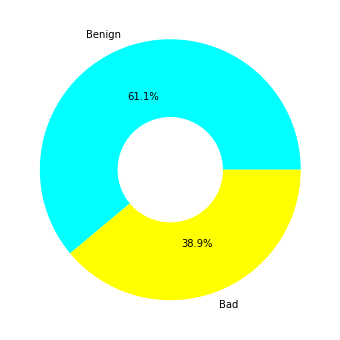

In [ ]:
valuecount = [data[data["type"] == 0].shape[0], data[data["type"] == 1].shape[0]+data[data["type"] == 2].shape[0]+data[data["type"] == 3].shape[0]]
plt.figure(figsize=(10,6))
my_circle=plt.Circle( (0,0), 0.4, color='white')
plt.pie(valuecount, labels=['Benign', 'Bad'], colors=['cyan','yellow'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

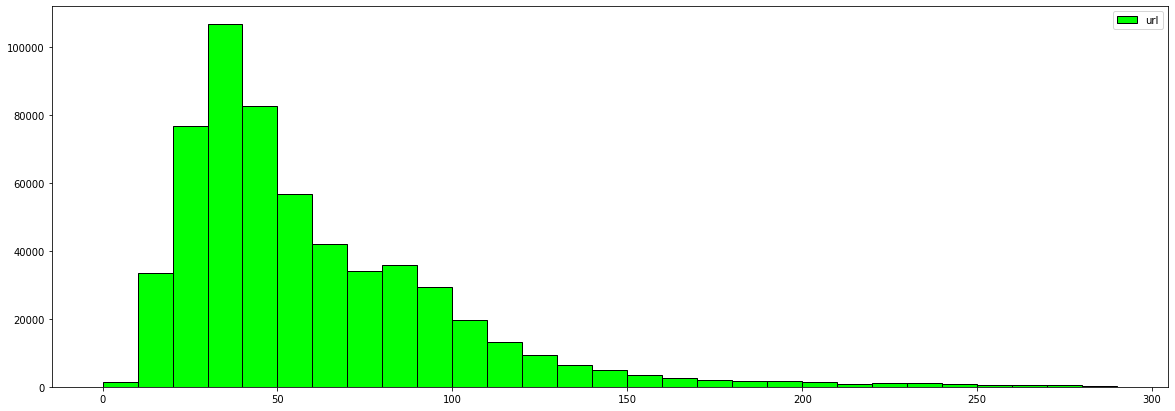

In [ ]:
lens = data.url.str.len()
lens.hist(legend =True,figsize=(20,7) ,bins = np.arange(0,300,10),grid = False,color='lime',edgecolor = "black")

# **Tokenizing URL**

In [ ]:
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def getTokens(input):
    tokensBySlash = str(input.encode('utf-8')).split('/')
    allTokens=[]
    for i in tokensBySlash:
        tokens = str(i).split('-')
        tokensByDot = []
        for j in range(0,len(tokens)):
            tempTokens = str(tokens[j]).split('.')
            tokentsByDot = tokensByDot + tempTokens
        allTokens = allTokens + tokens + tokensByDot
    allTokens = list(set(allTokens))
    if 'com' in allTokens:
        allTokens.remove('com')
    return allTokens

In [ ]:
y = [d[1]for d in data] #labels
myUrls = [d[0]for d in data] #urls
vectorizer = TfidfVectorizer( tokenizer=getTokens ,use_idf=True, smooth_idf=True, sublinear_tf=False)
features = vectorizer.fit_transform(data.url)
labels = data.type
features.shape


(573088, 686315)

# **Logistic Regression**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression(random_state=0)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data.index, test_size=0.20, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)
clf = LogisticRegression(random_state=0) 
clf.fit(X_train,y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print ('train accuracy for Logistic Regression is = ', train_score)
print ('test accuracy for Logistic Regression is  = ', test_score)

train accuracy for Logistic Regression is =  0.9254978515497198
test accuracy for Logistic Regression is  =  0.9045525135668046


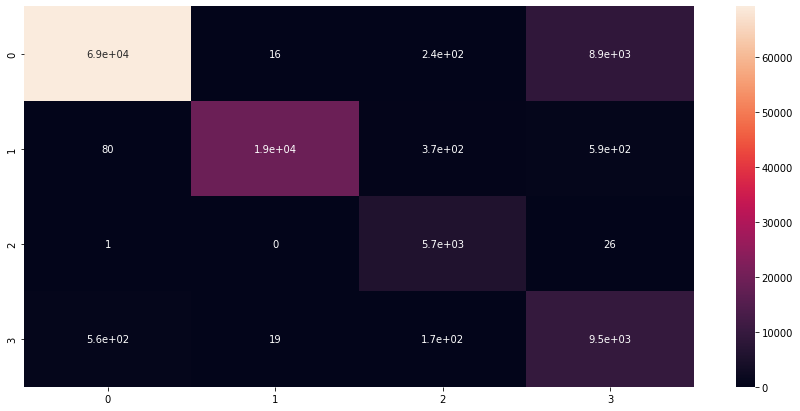

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
y_pred = clf.predict(X_test)
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(15,7))
sns.heatmap(cm, annot = True)

# **Feature Extraction**

In [ ]:
import re
from urllib.parse import urlparse
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        return 1
    else:
        return 0

df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [ ]:
df['count.'] = df['url'].apply(lambda i: i.count('.'))
df.head()

,url,type,abnormal_url,count.
0,br-icloud.com.br,3,0,2
1,mp3raid.com/music/krizz_kaliko.html,0,0,2
2,bopsecrets.org/rexroth/cr/1.htm,0,0,2
3,http://www.garage-pirenne.be/index.php?option=...,1,1,3
4,http://adventure-nicaragua.net/index.php?optio...,1,1,2


In [ ]:
df['count-www'] = df['url'].apply(lambda i: i.count('www'))
df['count@'] = df['url'].apply(lambda i: i.count('@'))

def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))

In [ ]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net', url)
    if match:
        return 1
    else:
        return 0
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [ ]:
df['count-https'] = df['url'].apply(lambda i : i.count('https'))
df['count-http'] = df['url'].apply(lambda i : i.count('http'))

In [ ]:
df['count%'] = df['url'].apply(lambda i: i.count('%'))
df['count?'] = df['url'].apply(lambda i: i.count('?'))
df['count-'] = df['url'].apply(lambda i: i.count('-'))
df['count='] = df['url'].apply(lambda i: i.count('='))
df['url_length'] = df['url'].apply(lambda i: len(str(i)))
df['hostname_length'] = df['url'].apply(lambda i: len(urlparse(i).netloc))

df.head()

,url,type,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length
0,br-icloud.com.br,3,0,2,0,0,0,0,0,0,0,0,0,1,0,16,0
1,mp3raid.com/music/krizz_kaliko.html,0,0,2,0,0,2,0,0,0,0,0,0,0,0,35,0
2,bopsecrets.org/rexroth/cr/1.htm,0,0,2,0,0,3,0,0,0,0,0,0,0,0,31,0
3,http://www.garage-pirenne.be/index.php?option=...,1,1,3,1,0,1,0,0,0,1,0,1,1,4,88,21
4,http://adventure-nicaragua.net/index.php?optio...,1,1,2,0,0,1,0,0,0,1,0,1,1,3,235,23


In [ ]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr|key|aol',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))

In [ ]:
df.head()

,url,type,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url
0,br-icloud.com.br,3,0,2,0,0,0,0,0,0,0,0,0,1,0,16,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,0,2,0,0,2,0,0,0,0,0,0,0,0,35,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,0,2,0,0,3,0,0,0,0,0,0,0,0,31,0,0
3,http://www.garage-pirenne.be/index.php?option=...,1,1,3,1,0,1,0,0,0,1,0,1,1,4,88,21,0
4,http://adventure-nicaragua.net/index.php?optio...,1,1,2,0,0,1,0,0,0,1,0,1,1,3,235,23,0


In [ ]:
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

In [ ]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['count-digits']= df['url'].apply(lambda i: digit_count(i))

In [ ]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['count-letters']= df['url'].apply(lambda i: letter_count(i))

In [ ]:
y = df[["type"]]
print(y.head(10),len(y))

   type
0     3
1     0
2     0
3     1
4     1
5     0
6     0
7     0
8     1
9     0 651191


In [ ]:
x = df.drop(df[["type"]],axis = 1)
x = x.drop(x[["url"]],axis = 1)
x.shape[0]

651191

In [ ]:
x.shape

(651191, 19)

In [ ]:
x.head()

,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,count-digits,count-letters
0,0,2,0,0,0,0,0,0,0,0,0,1,0,16,0,0,0,0,13
1,0,2,0,0,2,0,0,0,0,0,0,0,0,35,0,0,5,1,29
2,0,2,0,0,3,0,0,0,0,0,0,0,0,31,0,0,7,1,25
3,1,3,1,0,1,0,0,0,1,0,1,1,4,88,21,0,9,7,63
4,1,2,0,0,1,0,0,0,1,0,1,1,3,235,23,0,9,22,199


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=True, random_state=5)

In [ ]:
X_train.head()

,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,count-digits,count-letters
60264,0,1,0,0,1,0,0,0,0,0,0,0,0,18,0,0,0,0,16
636133,0,2,0,0,1,0,0,0,0,0,0,0,0,25,0,0,9,0,22
485020,1,2,0,0,2,0,0,0,1,0,0,0,0,40,13,0,4,3,30
541194,1,4,0,0,1,0,0,0,1,0,0,0,0,35,21,0,6,17,9
485199,1,1,0,0,2,0,0,0,1,24,0,0,0,90,9,0,72,28,32


# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=100,max_features="log2")
model2.fit(X_train,y_train)

RandomForestClassifier(max_features='log2')

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = model2.predict(X_test)
accuracy_score(y_pred,y_test)

0.9656631270203242

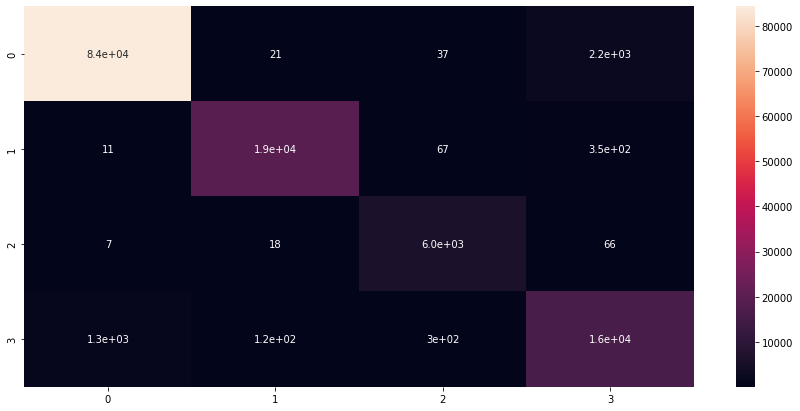

In [ ]:
plt.figure(figsize=(15,7))

cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot = True)

In [ ]:
import joblib
joblib.dump(model2,"Malicious_dataset.csv")

['Malicious_dataset.csv']

# **Feature Importance**

In [ ]:
df1=df.iloc[:,:-1].columns
importance=model2.feature_importances_
sortedimp1=sorted(importance,reverse=True)
sortedimp=sortedimp1[:10]
sortedimp1=sortedimp1[:10]
sortedimp1.append(1-sum(sortedimp))
indices=np.argsort( -importance[:10])

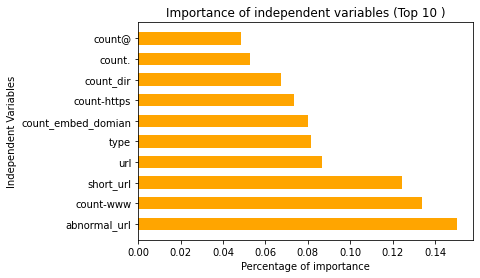

In [ ]:
x=np.arange(10)
plt.title("Importance of independent variables (Top 10 )")
plt.barh(x,sortedimp,animated=True,height=0.6,linewidth =2,color="orange")
plt.yticks(x,df1[indices])
plt.xlabel("Percentage of importance")
plt.ylabel("Independent Variables")
plt.show()

In [ ]:
df1[indices]

Index(['abnormal_url', 'count-www', 'short_url', 'url', 'type',
       'count_embed_domian', 'count-https', 'count_dir', 'count.', 'count@'],
      dtype='object')

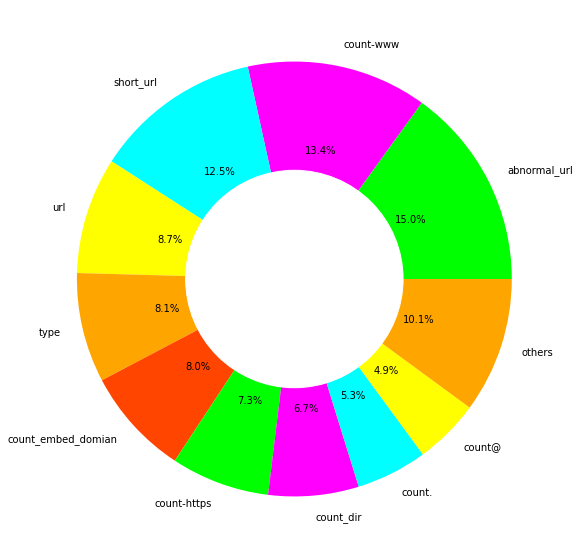

In [ ]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(sortedimp1, labels=['abnormal_url', 'count-www', 'short_url', 'url', 'type',
       'count_embed_domian', 'count-https', 'count_dir', 'count.', 'count@','others'],
        colors=["lime","magenta","cyan","yellow",'orange','orangered'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters=[{"n_estimators":[10,20,30],
             "max_features":["sqrt","log2"],
             "criterion":["gini","entropy"]}]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
grid=GridSearchCV(RandomForestClassifier(),parameters,cv=5,n_jobs=-1)
grid.fit(X_train,y_train)
grid.cv_results_

{'mean_fit_time': array([15.43891845, 22.39470124, 35.20842571, 12.1523581 , 23.7421699 ,
        35.29880733, 11.30719304, 23.20626268, 33.54448304, 11.71000509,
        22.93839855, 31.80832295]),
 'mean_score_time': array([0.60843859, 0.91950941, 1.3911871 , 0.49024262, 0.94818401,
        1.52074876, 0.460291  , 0.91450529, 1.30949397, 0.44991622,
        0.9025857 , 1.24100037]),
 'mean_test_score': array([0.96311368, 0.96403699, 0.96441899, 0.96300427, 0.96410226,
        0.96453224, 0.96289869, 0.9640965 , 0.96439979, 0.9628795 ,
        0.96411954, 0.96447081]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'gini',
                    'entropy', 'entropy', 'entropy', 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['sqrt', 's

In [ ]:
df_RandomForestClassifier=pd.DataFrame(grid.cv_results_)
df_RandomForestClassifier

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,15.438918,2.386008,0.608439,0.177364,gini,sqrt,10,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.962857,0.963269,0.962962,0.962914,0.963567,0.963114,0.000268,9
1,22.394701,2.106997,0.919509,0.013618,gini,sqrt,20,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.963385,0.964296,0.964018,0.964133,0.964354,0.964037,0.000347,8
2,35.208426,1.126885,1.391187,0.032589,gini,sqrt,30,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.964124,0.964565,0.964555,0.964555,0.964296,0.964419,0.000179,3
3,12.152358,0.533717,0.490243,0.008602,gini,log2,10,"{'criterion': 'gini', 'max_features': 'log2', ...",0.962550,0.963097,0.963144,0.962847,0.963384,0.963004,0.000284,10
4,23.742170,0.860342,0.948184,0.015088,gini,log2,20,"{'criterion': 'gini', 'max_features': 'log2', ...",0.963672,0.964277,0.964286,0.964008,0.964267,0.964102,0.000239,6
5,35.298807,1.133054,1.520749,0.269633,gini,log2,30,"{'criterion': 'gini', 'max_features': 'log2', ...",0.964488,0.964671,0.964613,0.964354,0.964536,0.964532,0.000109,1
6,11.307193,0.281882,0.460291,0.005871,entropy,sqrt,10,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.962751,0.963010,0.962770,0.962588,0.963375,0.962899,0.000274,11
7,23.206263,0.646913,0.914505,0.016261,entropy,sqrt,20,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.963778,0.964450,0.964162,0.964085,0.964008,0.964097,0.000218,7
8,33.544483,0.753912,1.309494,0.007926,entropy,sqrt,30,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.964191,0.964786,0.964478,0.964325,0.964219,0.964400,0.000218,4
9,11.710005,0.386775,0.449916,0.010181,entropy,log2,10,"{'criterion': 'entropy', 'max_features': 'log2...",0.962540,0.962818,0.963058,0.963029,0.962952,0.962879,0.000189,12


In [ ]:
print("Best Score of Random Forest Classifier is ",grid.best_score_)
print("Best parameters of Random Forest Classifier is ",grid.best_params_)

Best Score of Random Forest Classifier is  0.9645322407928815
Best parameters of Random Forest Classifier is  {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 30}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators=40, criterion='gini',max_features= 'sqrt',random_state=0)
classifier2.fit(X_train,y_train)
y_pred=classifier2.predict(X_test)
y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([2, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_pred,y_test)

0.9651794009474889

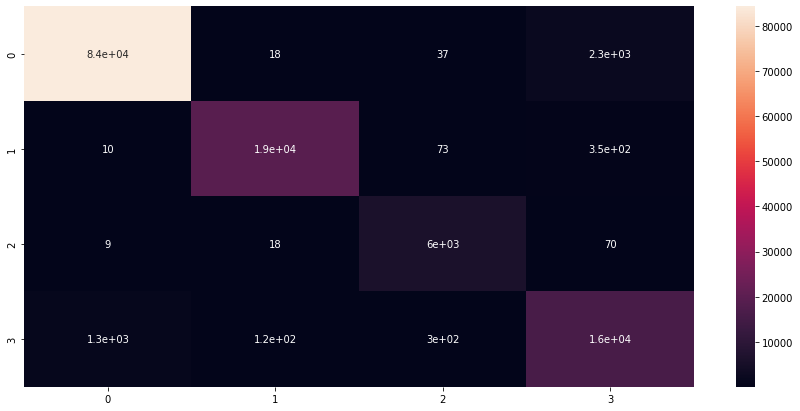

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(15,7))
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot = True)

## **Decision Tree Classifier**

In [ ]:
from sklearn import tree

In [ ]:
model_dT=tree.DecisionTreeClassifier()

In [ ]:
model_dT.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dT = model_dT.predict(X_test)

In [ ]:
pd.DataFrame(pred_dT)

,0
0,2
1,0
2,0
3,0
4,0
...,...
130234,0
130235,1
130236,0
130237,0


In [ ]:
pd.DataFrame(y_test)

,type
544329,2
120435,0
605363,3
50634,0
207252,0
...,...
346265,0
470638,1
309830,0
49324,0


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(pred_dT,y_test)

0.9571633688833606

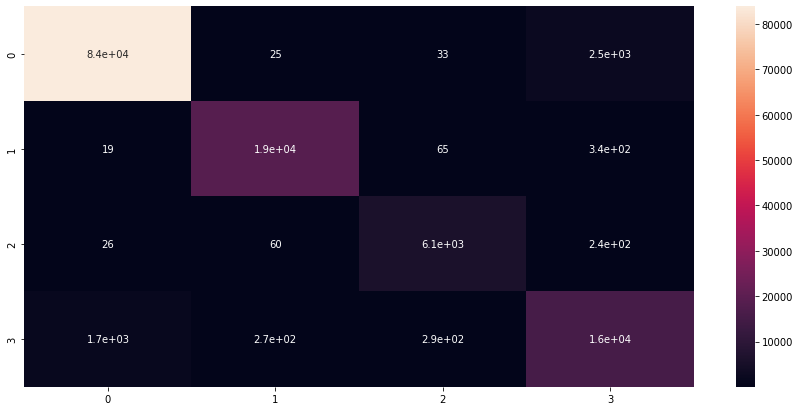

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(15,7))
cm=confusion_matrix(pred_dT,y_test)
sns.heatmap(cm, annot = True)

## **Deep Learning Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [ ]:
df.head()

,url,type,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,...,count%,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,count-digits,count-letters
0,br-icloud.com.br,3,0,2,0,0,0,0,0,0,...,0,0,1,0,16,0,0,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,0,0,2,0,0,2,0,0,0,...,0,0,0,0,35,0,0,5,1,29
2,bopsecrets.org/rexroth/cr/1.htm,0,0,2,0,0,3,0,0,0,...,0,0,0,0,31,0,0,7,1,25
3,http://www.garage-pirenne.be/index.php?option=...,1,1,3,1,0,1,0,0,0,...,0,1,1,4,88,21,0,9,7,63
4,http://adventure-nicaragua.net/index.php?optio...,1,1,2,0,0,1,0,0,0,...,0,1,1,3,235,23,0,9,22,199


In [ ]:
x = df.drop(df[["url"]],axis = "columns")
x = x.drop(x[["type"]], axis = "columns")
x.head()

,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,count-digits,count-letters
0,0,2,0,0,0,0,0,0,0,0,0,1,0,16,0,0,0,0,13
1,0,2,0,0,2,0,0,0,0,0,0,0,0,35,0,0,5,1,29
2,0,2,0,0,3,0,0,0,0,0,0,0,0,31,0,0,7,1,25
3,1,3,1,0,1,0,0,0,1,0,1,1,4,88,21,0,9,7,63
4,1,2,0,0,1,0,0,0,1,0,1,1,3,235,23,0,9,22,199


In [ ]:
x.shape

(651191, 19)

In [ ]:
y = df["type"]
y

0         3
1         0
2         0
3         1
4         1
         ..
651186    3
651187    3
651188    3
651189    3
651190    3
Name: type, Length: 651191, dtype: int64

In [ ]:
y.shape

(651191,)

In [ ]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
def baseline_model():
		model = Sequential()
		model.add(Dense(64, input_dim=19, activation='relu'))
		model.add(Dense(4, activation='softmax'))
		model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
		return model

In [ ]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=50, batch_size=2048, verbose=0)

In [ ]:
kfold = KFold(n_splits=5, shuffle=True)

In [ ]:
results = cross_val_score(estimator, x, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 93.08% (0.09%)


In [ ]:
results

array([0.93011308, 0.93237764, 0.9306193 , 0.93128735, 0.929721  ])

# Conclusion - 
The Highest Accuracy score we got is 96.56% for Random Forest Classifier with parameters being - 'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 30